# Task 48 - Unsupervised Learning I: Clustering I	

### <font color="blue">Hemant Thapa

--------------------------------------------------------------------------------

### 1. IRIS FLOWER SPECIES

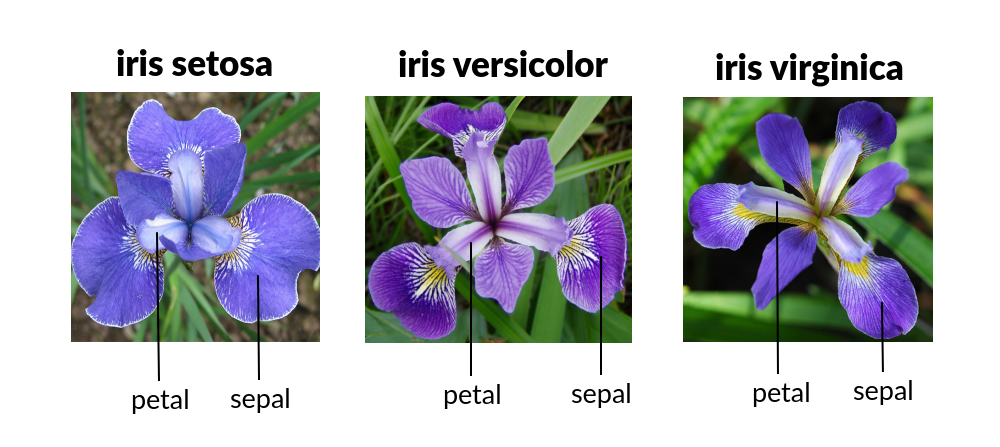

Supervised learning is a type of machine learning where the model is trained on labeled data. The model is given input/feature data and corresponding correct output/target data, and it has to learn to map the inputs to the correct outputs. The model is then used to predict outputs for new data. Examples of supervised learning include regression and classification tasks.


Unsupervised learning is a type of machine learning where the model is trained on unlabeled data. The model does not receive any specific target/output data and must find patterns, relationships, and structure in the data on its own. Examples of unsupervised learning include clustering, dimensionality reduction, and anomaly detection.

--------------------------------------------------------------------------------

### 2. LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

--------------------------------------------------------------------------------

### 3. LOADING DATASE

In [2]:
df = pd.read_csv('iris.csv')
df[:10]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


Removing Unnecessary Columns

In [3]:
df.drop('Id', axis=1, inplace=True)

In [4]:
df[:5]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Checking Varities of Iris flower

In [5]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Checking row and columns

In [6]:
df.shape

(150, 5)

Checking null values

In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

--------------------------------------------------------------------------------

### 4. IMAGE OF SEPAL LENGTH AND PETAL LENGTH 

In [8]:
df.columns = df.columns.str.lower()
df.columns

Index(['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm',
       'species'],
      dtype='object')

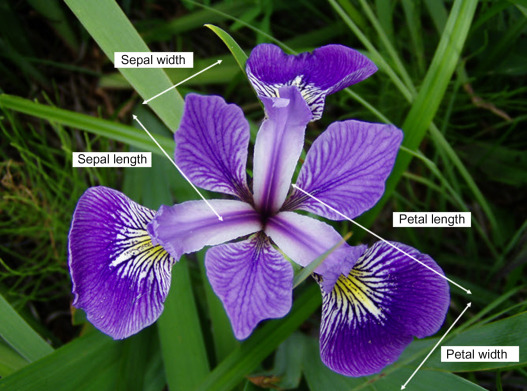

--------------------------------------------------------------------------------

### 5. PRE PROCESSING

In Preprocessing step, we are going to do some features selection. No all features will have equal impact to our outcome variable, and some will have no impact at all. 

We can train our model with only significant features, both to lower runtime and improve results.

In [9]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### 5.1 Bar Graph for representing Min and Max value between three different species

In [10]:
#String comparision and seprating into each dataset for finding max and min value
df_setosa = df[df['species'] == 'Iris-setosa']
df_virginica = df[df['species'] == 'Iris-virginica']
df_versicolor = df[df['species'] == 'Iris-versicolor']

#### SETOSA 

In [11]:
df_setosa.max()

sepallengthcm            5.8
sepalwidthcm             4.4
petallengthcm            1.9
petalwidthcm             0.6
species          Iris-setosa
dtype: object

In [12]:
df_setosa.min()

sepallengthcm            4.3
sepalwidthcm             2.3
petallengthcm            1.0
petalwidthcm             0.1
species          Iris-setosa
dtype: object

#### VERSICOLOR

In [13]:
df_versicolor.max()

sepallengthcm                7.0
sepalwidthcm                 3.4
petallengthcm                5.1
petalwidthcm                 1.8
species          Iris-versicolor
dtype: object

In [14]:
df_versicolor.min()

sepallengthcm                4.9
sepalwidthcm                 2.0
petallengthcm                3.0
petalwidthcm                 1.0
species          Iris-versicolor
dtype: object

#### VIRGINICA

In [15]:
df_virginica.max()

sepallengthcm               7.9
sepalwidthcm                3.8
petallengthcm               6.9
petalwidthcm                2.5
species          Iris-virginica
dtype: object

In [16]:
df_virginica.min()

sepallengthcm               4.9
sepalwidthcm                2.2
petallengthcm               4.5
petalwidthcm                1.4
species          Iris-virginica
dtype: object

#### 1. Species vs Sepal Length

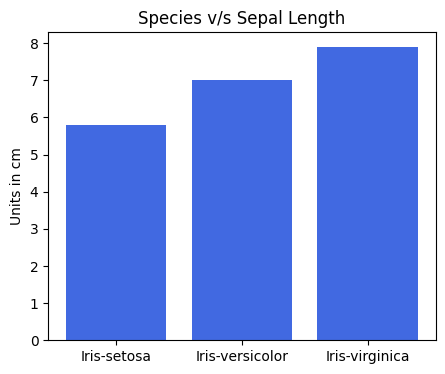

In [17]:
#Exploring the binary independent feature
plt.figure(figsize=(5,4))
plt.bar(df.species, df.sepallengthcm, width=0.8, color='royalblue')
plt.xticks([0,1,2])
plt.title('Species v/s Sepal Length')
plt.ylabel('Units in cm')
plt.show()

1. Iris-Virginica has highest sepal length
2. Iris -Setosa has smallest sepal length

#### 2. Species vs Sepal Width

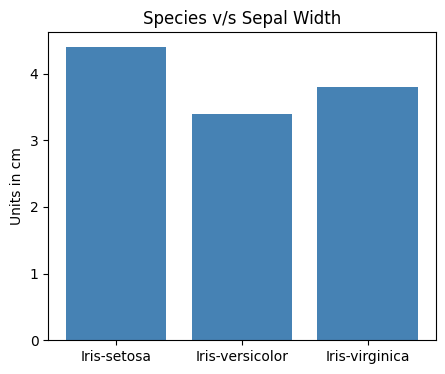

In [18]:
#Exploring the binary independent feature
plt.figure(figsize=(5,4))
plt.bar(df.species, df.sepalwidthcm, width=0.8, color='steelblue')
plt.xticks([0,1,2])
plt.title('Species v/s Sepal Width')
plt.ylabel('Units in cm')
plt.show()

1. Iris-Setosa has highets sepal width
2. Iris-Versicolor has smallest sepal width

#### 3. Species vs Petal Length

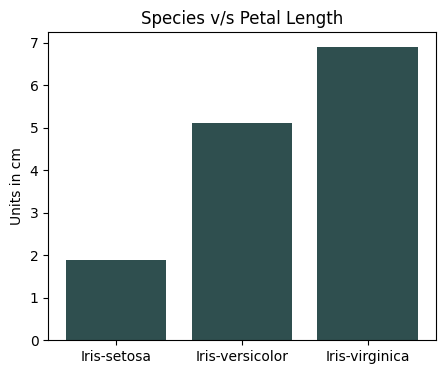

In [19]:
#Exploring the binary independent feature
plt.figure(figsize=(5,4))
plt.bar(df.species, df.petallengthcm, width=0.8, color="darkslategrey")
plt.xticks([0,1,2])
plt.title('Species v/s Petal Length')
plt.ylabel('Units in cm')
plt.show()

1. Iris Virginica has highest Petal length
2. Iris Setosa has smallest Petal length

#### 4. Species vs Petal Width

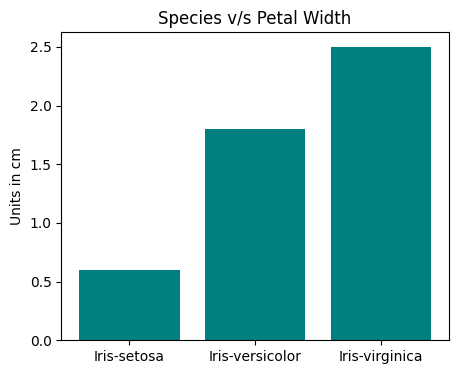

In [20]:
#Exploring the binary independent feature
plt.figure(figsize=(5,4))
plt.bar(df.species, df.petalwidthcm, width=0.8, color="teal")
plt.xticks([0,1,2])
plt.title('Species v/s Petal Width')
plt.ylabel('Units in cm')
plt.show()

1. Iris Viginica has highest Petal width
2. Iris Setosa has smallest Petal width

--------------------------------------------------------------------------------

### PLOTTING PAIRWISE DATA RELATIONSHIP (Exploring the continous independent features)

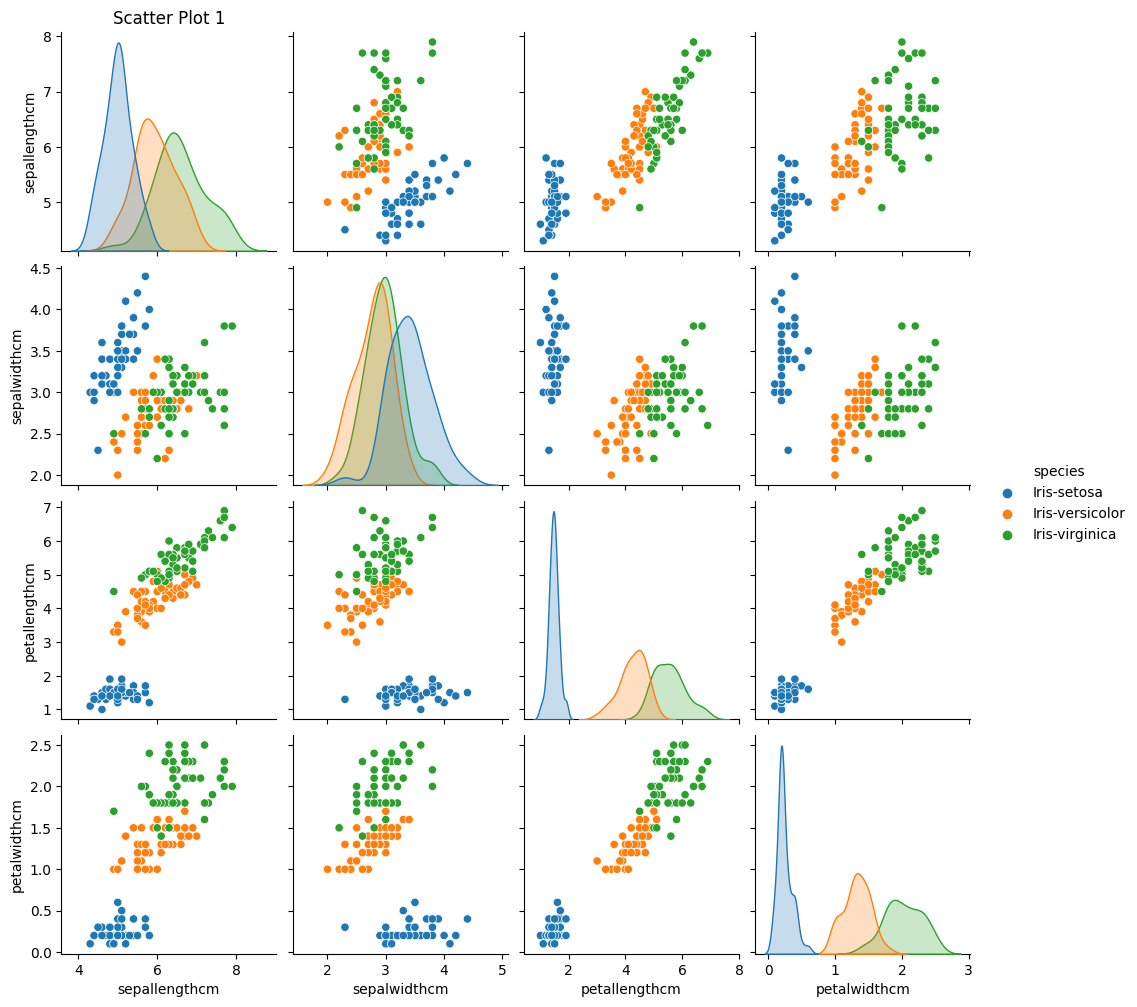

In [21]:
pairplot = sns.pairplot(df, hue='species')

# Access the first scatter plot
scatter = pairplot.axes[0,0]

# Manipulate the plot
scatter.set_title("Scatter Plot 1")

# Show the plot
plt.show()

#### The Iris dataset has four measurements for each of three different species of flowers. we can see how it different from each other.

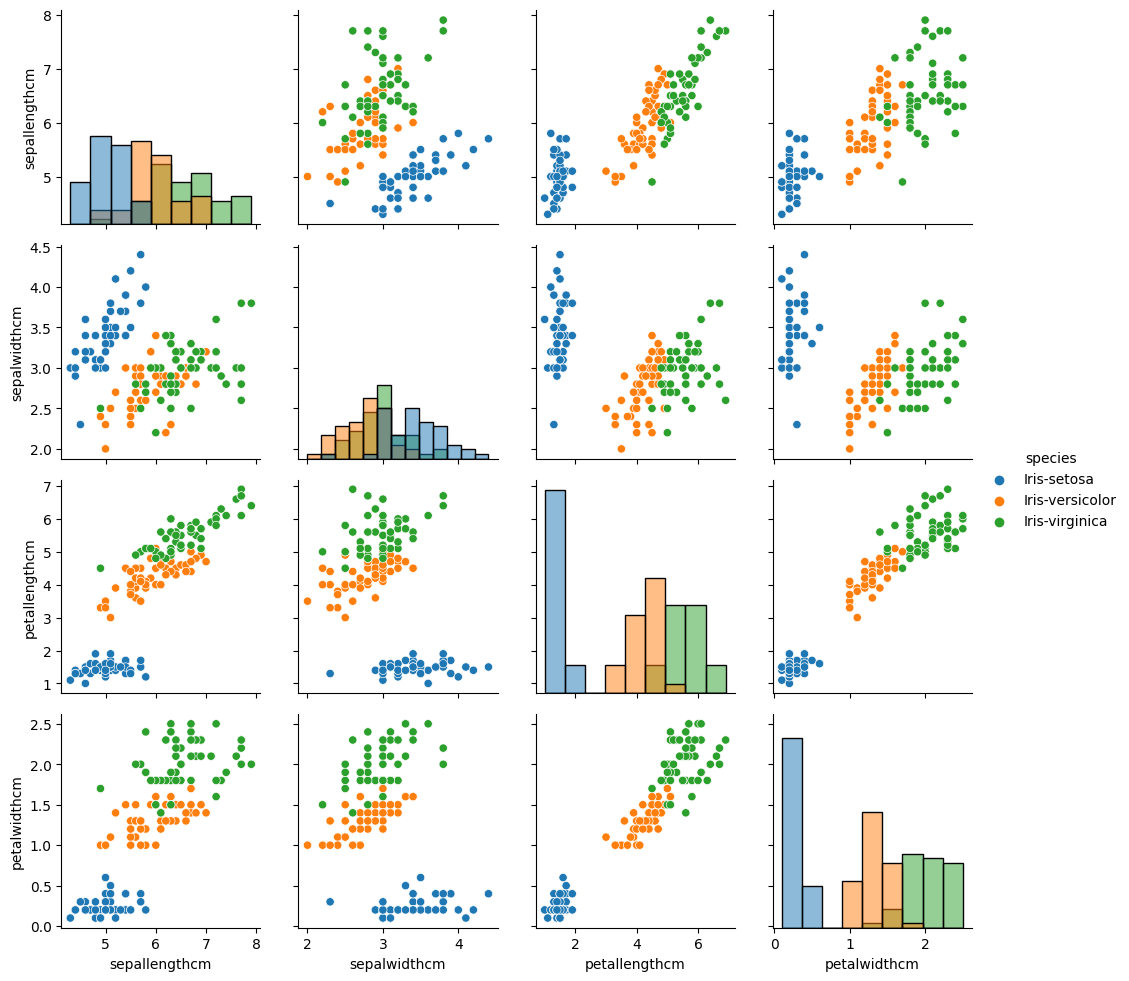

In [22]:
g = sns.PairGrid(df, hue='species')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

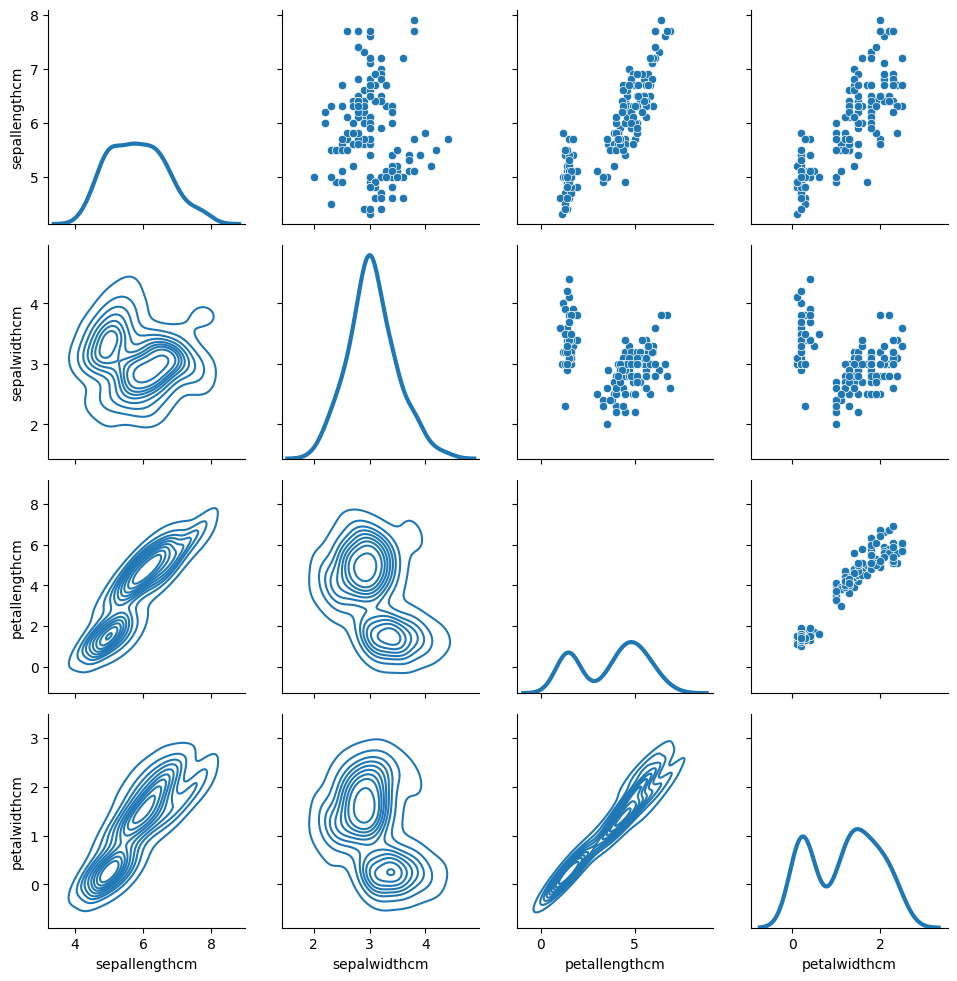

In [23]:
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.show()

--------------------------------------------------------------------------------

### Sepal Length v/s Petal Length

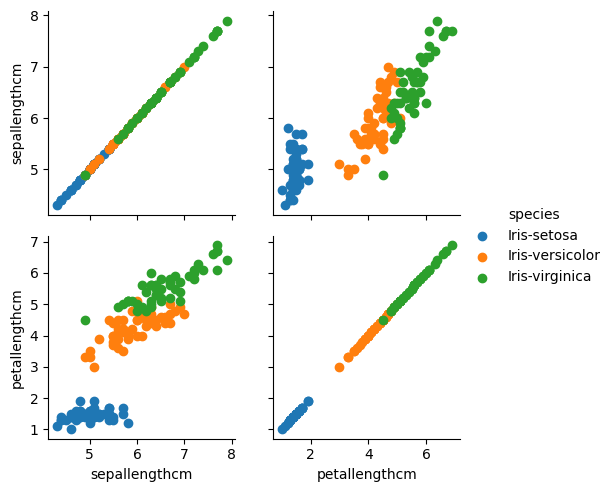

In [24]:
# Create a PairGrid object using the sepal length and width columns from the dataframe
g = sns.PairGrid(df, vars=["sepallengthcm", "petallengthcm"], hue='species')

# Use the scatter plot as the mapping method for the PairGrid
g.map(plt.scatter)

# Add a legend to the plot to indicate the different species
g.add_legend()

# Show the plot
plt.show()

#### Iris setosa length does not overlap with Iris versicolor and Virginica, Where Iris versicolor and Virginica does overlap. 

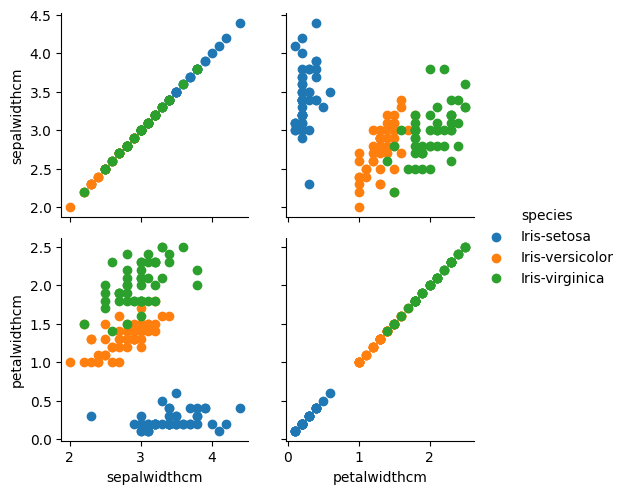

In [25]:
# Create a PairGrid object using the sepal length and width columns from the dataframe
g = sns.PairGrid(df, vars=["sepalwidthcm", "petalwidthcm"], hue='species')

# Use the scatter plot as the mapping method for the PairGrid
g.map(plt.scatter)

# Add a legend to the plot to indicate the different species
g.add_legend()

# Show the plot
plt.show()

In [26]:
df.columns

Index(['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm',
       'species'],
      dtype='object')

--------------------------------------------------------------------------------

### SELECTING K

Unsupervised learning is a type of machine learning where the model is not provided with labeled data and is tasked to find patterns or relationships in the data on its own. The goal is to uncover the underlying structure in the data without any external guidance or labeling. Unsupervised learning algorithms, such as clustering or dimensionality reduction, do not have an independent variable or target label to predict, so they learn from the inherent structure in the data itself.

In [27]:
df[:5]

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
#Features
X = df[['sepallengthcm', 'petallengthcm','petalwidthcm','sepalwidthcm']].values.reshape(-1,2)
print(X.shape)

(300, 2)


In [29]:
X[:5]

array([[5.1, 1.4],
       [0.2, 3.5],
       [4.9, 1.4],
       [0.2, 3. ],
       [4.7, 1.3]])

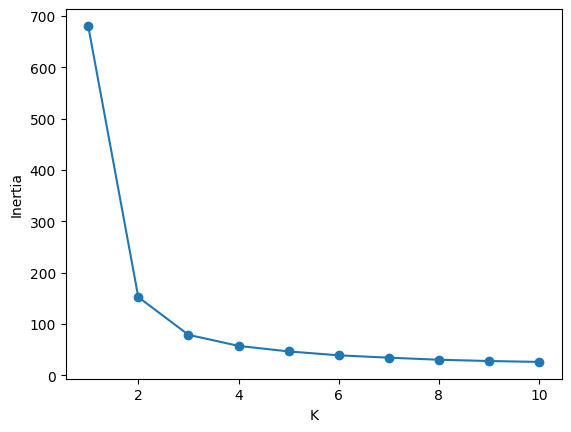

In [64]:
def evaluation_Kmeans(x,k,r):
    # Initialize KMeans model with specified number of clusters and random state
    kmeans = KMeans(n_clusters=k, random_state=r)
    
    # Fit the KMeans model to the input data
    kmeans.fit(x)
    
    # Return the within cluster variance
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=123):
    # Compute the within cluster variance for each value of k
    within_cluster_vars = [evaluation_Kmeans(x,k,r) for k in range(1, max_k+1)]
    
    # Plot the within cluster variance against the number of clusters
    plt.plot(range(1,11), within_cluster_vars, marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()
    
# Run the elbow method to visualize the trade-off between number of clusters and within cluster variance
elbow_Kmeans(X)

In [31]:
# Define a list of clustering algorithms
algorithms = [KMeans(n_clusters=3), 
              AgglomerativeClustering(n_clusters=3),
              DBSCAN()]

# Calculate silhouette scores for each algorithm
scores = []
for algo in algorithms:
    labels = algo.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

# Get the index of the algorithm with the highest silhouette score
best_index = scores.index(max(scores))
best_algorithm = algorithms[best_index]
best_algorithm

AgglomerativeClustering(n_clusters=3)

In [32]:
df.describe()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Comapring describe data and scatter plot

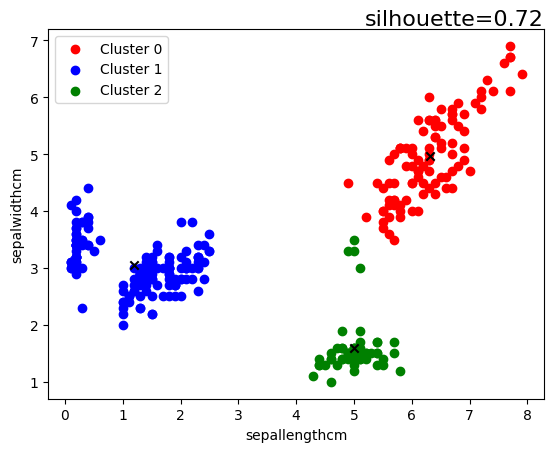

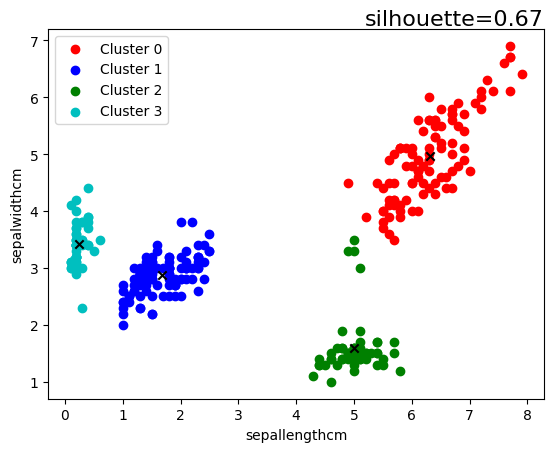

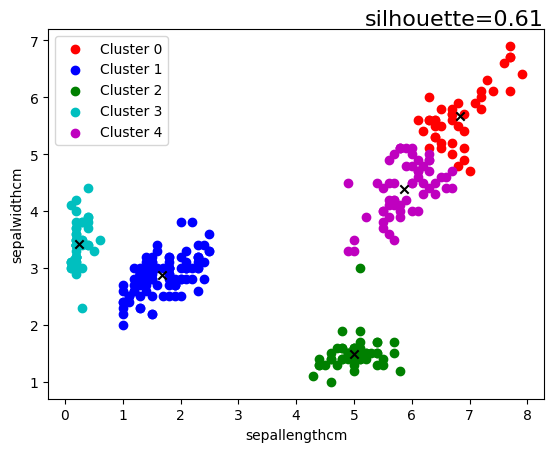

In [33]:
#A function to create a KMeans clustering plot, where x is the input data, 
#k is the number of clusters, and r is the random seed used in initializing the KMeans algorithm.
def scatter_Kmeans(x, k, r=123):
    #Initializing the KMeans algorithm with the specified number of clusters (k), using "k-means++" 
    #for initializing the centroids, and setting the random state for reproducibility.
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    #Fitting the KMeans algorithm to the input data and making the cluster predictions.
    y_pred = kmeans.fit_predict(x)
    #Defining the color palette for the scatter plot.
    colours = 'rbgcmy'
    #A for loop to create a scatter plot for each cluster, where c is the cluster index.
    for c in range(k):
        #Plotting the data points assigned to the current cluster using the color corresponding to the cluster index.
        plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
        #Plotting the cluster centers using black X markers.
        plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    #Calculating the silhouette score for the KMeans clustering results.
    score = round(silhouette_score(x, kmeans.labels_, metric='euclidean'),2)
    # Adding the silhouette score to the plot title.
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    #Setting the x-axis and y-axis labels for the plot.
    plt.xlabel('sepallengthcm')
    plt.ylabel('sepalwidthcm')
    #Adding the cluster legend to the plot.
    plt.legend()
    #Displaying the plot.
    plt.show()
#A for loop to create KMeans clustering plots for different values of k, where k ranges from 3 to 6.
for k in range(3,6):
    #Calling the scatter_Kmeans function for each value of k 
    #and using the four columns of the data (X) as the input data.
      scatter_Kmeans(X, k, r=0)


Each value of k in the range (3, 6), it fits a KMeans model to the data with n_clusters=k and a random state of 0. The fit_predict method has used to predict the cluster assignments of each data point.

The predicted cluster assignments are then used to color the scatter plot, with each cluster assigned a different color. The cluster centers are also plotted as black X markers.

The Silhouette Score has calculated for the KMeans model with x as the input data and kmeans.labels_ as the cluster labels. The Silhouette Score is a measure of how well separated the clusters are, with a score close to 1 indicating a high degree of separation. The score is displayed in the title of the plot.

### These are best silhouette score is actaully achieved using k = 3

--------------------------------------------------------------------------------------------------------

### ACCURACY OF KNN (SUPERVISED) 

supervised learning algorithms are provided with labeled data and are tasked to predict the value of a target label based on the input features. The algorithms learn the relationship between the input and target variables through training, and then make predictions for new data. Supervised learning algorithms, such as regression or classification, have a clear dependent variable that is being predicted based on the input features.

In [34]:
df[:10]

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [35]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [36]:
df.species = df.species.replace('Iris-setosa',0)
df.species = df.species.replace('Iris-versicolor',1)
df.species = df.species.replace('Iris-virginica',2)

In [37]:
df.species.unique()

array([0, 1, 2])

In [38]:
df[:10]

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


Features are the independent variables and target is the dependent variable. So in your code, X represents the features and y represents the target. 

In [39]:
# Separate the feature and target variables

#Features
X = df[['sepallengthcm', 'petallengthcm','petalwidthcm','sepalwidthcm']]
#target
y = df['species']

In [40]:
# Separate and redefining for easy understanding
features = X #independent, it is like snp500 index. which are made up of group of companies
target = y #dependent, it is like microsoft, which is single company

In [41]:
features.head(5)

,sepallengthcm,petallengthcm,petalwidthcm,sepalwidthcm
0,5.1,1.4,0.2,3.5
1,4.9,1.4,0.2,3.0
2,4.7,1.3,0.2,3.2
3,4.6,1.5,0.2,3.1
4,5.0,1.4,0.2,3.6


In [42]:
# reshape features
features = np.array(features).reshape(-1,4)
features[:5]

array([[5.1, 1.4, 0.2, 3.5],
       [4.9, 1.4, 0.2, 3. ],
       [4.7, 1.3, 0.2, 3.2],
       [4.6, 1.5, 0.2, 3.1],
       [5. , 1.4, 0.2, 3.6]])

In [43]:
print(f'Features Array Dimension: {features.ndim}')

Features Array Dimension: 2


In [44]:
target.head(5)

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [45]:
print(f'Target Array Dimension: {target.ndim}')

Target Array Dimension: 1


#### Spliting the data into training and testing, 80 % on Training dataset and 20% on Testing dataset

In [46]:
print(features.shape)
print(target.shape)

(150, 4)
(150,)


In [47]:
# Split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)

In [48]:
print("Spliting 80 percent training and 20 percent on testing")
print()
print(f"Training set: {features_train.shape, target_train.shape}")
print(f"Testing set: {features_test.shape, target_test.shape}")

Spliting 80 percent training and 20 percent on testing

Training set: ((120, 4), (120,))
Testing set: ((30, 4), (30,))


In [49]:
# Train the K-Nearest Neighbors model with 3 nearest neighbors
knn = KNeighborsClassifier(n_neighbors=3)

In [50]:
# Fit the classifier to the training data
knn.fit(features_train, target_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
# Predict the target for the test data
target_pred = knn.predict(features_test)
target_pred[:5]

array([1, 0, 2, 2, 1])

In [52]:
knn_score = knn.score(features_test, target_test)

# Print the accuracy of the model
print('Accuracy of the KNN model:', round(knn_score,4))

Accuracy of the KNN model: 0.9333


In [53]:
print(f"Accuracy in percentage {round((100*np.mean(target_pred == target_test)),2)}%")

Accuracy in percentage 93.33%
